Train: 288, Validation: 96, Test: 96
Epoch 1/200


C:\Users\nicol\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1788 - val_loss: 0.2443
Epoch 2/200
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0685 - val_loss: 0.1683
Epoch 3/200
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0381 - val_loss: 0.1283
Epoch 4/200
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0285 - val_loss: 0.1070
Epoch 5/200
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0232 - val_loss: 0.0933
Epoch 6/200
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0199 - val_loss: 0.0831
Epoch 7/200
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0177 - val_loss: 0.0750
Epoch 8/200
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0161 - val_loss: 0.0683
Epoch 9/200
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0149 - val_loss: 0.0631
Epoch 10/200
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0140 - val_loss: 0.0590
Epoch 11/200
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0134 - val_loss: 0.0557
Epoch 12/200
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0129 - val_lo

Text(0.5, 1.0, 'Loss')

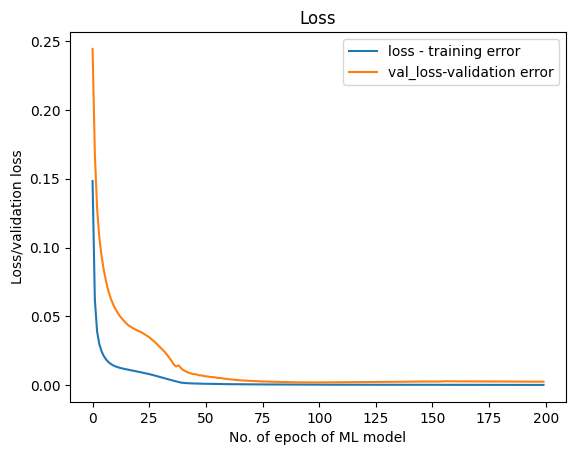

In [2]:
import numpy as np
import random
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Set seeds for reproducibility
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

# ---- STEP 1: LOAD & PREPROCESSING DATA ---- #
df = pd.read_csv("E:/Csv_Tool/summary.csv")

# First, split off the test set (15%)
train_val, test = train_test_split(df, test_size=0.2, random_state=42)

# Then, split the remaining 85% into train (70%) and val (15%)
train, val = train_test_split(train_val, test_size=0.25, random_state=42)  # 0.1765 ≈ 15% / 85%

# Print split sizes
print(f"Train: {len(train)}, Validation: {len(val)}, Test: {len(test)}")

# Define inputs (decision variables) --- These are the 
X_columns = ["Feed f_c", "Cutting Speed v_c", "Flank angle(Alpha)", "Flank length(l_Alpha1)", "Rake angle (Gamma)"] ##After computing NSGA we get pareto optimal solution of these variables

    # Define objectives  (These are the objectives we want to optimize: minimize Force-X, Temperature, Tool Stress; maximize Force-Y)
    #The solution to the objectives below will be nothing but the combination of the inputs which can provide the best output i.e the pareto solutions
Y_columns = ["Force-X (N)", "Temperature (C)", "Tool Stress (MPa)", "Force-Y (N)"]   ##After computing NSGA we get pareto optimal objectives of these variables

X = df[X_columns].values  # Extract input data
Y = df[Y_columns].values  # Extract output data

# Normalize data
X_scaler = MinMaxScaler()
Y_scaler = MinMaxScaler()

X_normalized = X_scaler.fit_transform(X)
Y_normalized = Y_scaler.fit_transform(Y)

# ---- STEP 2: TRAIN A NEURAL NETWORK MODEL ---- #
model = keras.Sequential([
    keras.layers.Dense(16, activation="relu", input_shape=(5,)),  # Updated input shape to 5
    keras.layers.Dense(16, activation="relu"),
    keras.layers.Dense(4, activation="linear")  # 4 outputs now
])

model.compile(optimizer="adam", loss="mse")
h = model.fit(X_normalized, Y_normalized, epochs=200, batch_size=8, verbose=1, validation_split=0.1,shuffle=True)

plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.legend(['loss - training error','val_loss-validation error'])
plt.xlabel("No. of epoch of ML model")
plt.ylabel("Loss/validation loss")
plt.title('Loss')

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


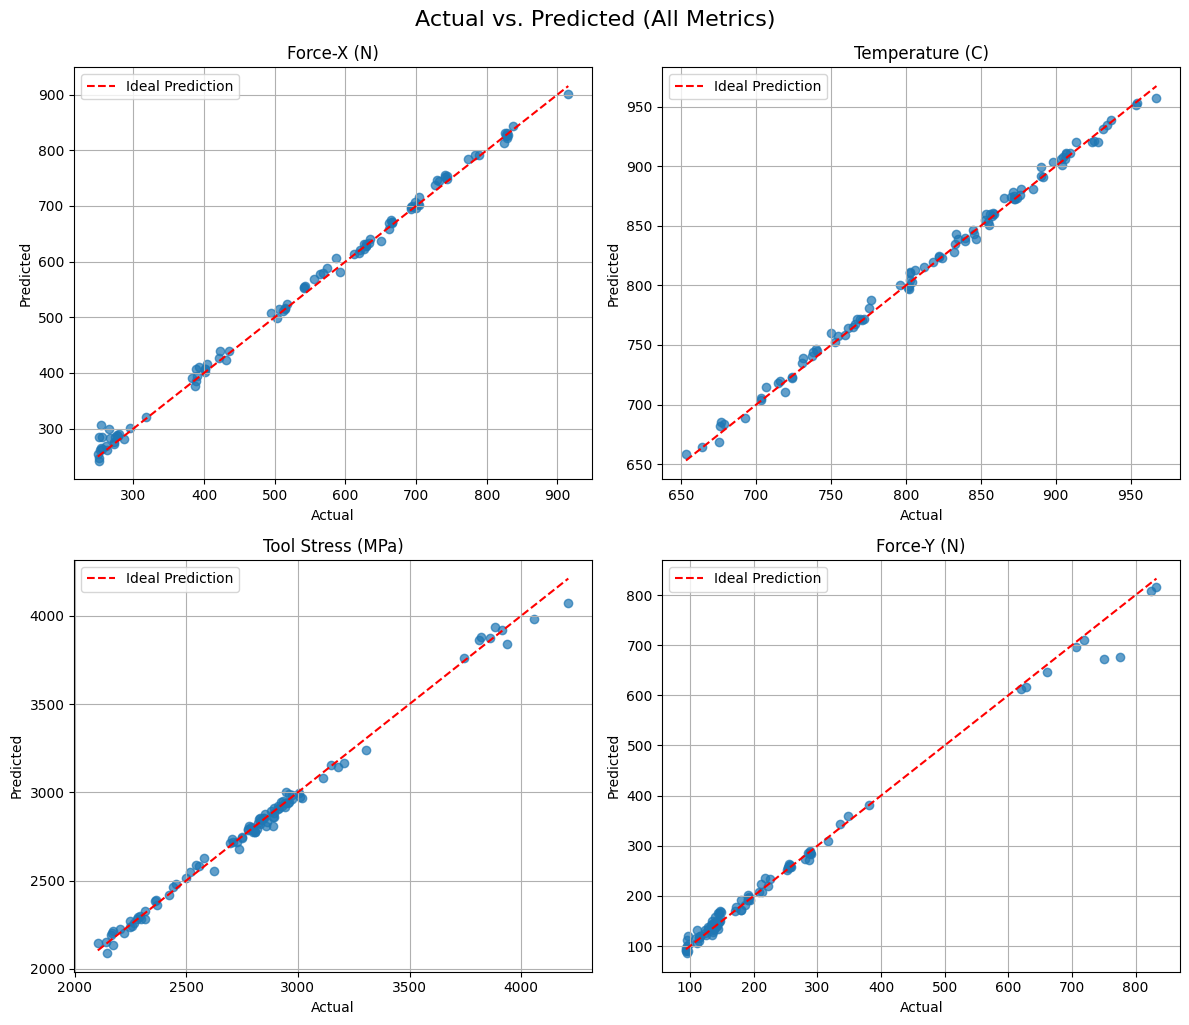

In [3]:
import matplotlib.pyplot as plt

# Evaluate on test data
X_test = test[X_columns].values  ##Trainig input data 
Y_test = test[Y_columns].values  ## Output data which are the ACTUAL OUTPUT values for X_test

# Normalize inputs
X_test_normalized = X_scaler.transform(X_test)

# Predict
Y_pred_normalized = model.predict(X_test_normalized)
Y_pred = Y_scaler.inverse_transform(Y_pred_normalized)  ##PREDICTED OUTPUT

# Plot
output_labels = Y_columns
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()  # Flatten 2D array of axes to 1D

for i in range(4): #i is the no. of ouput columns=4 where 1,2,3,4 is Force-X (N)", "Temperature (C)", "Tool Stress (MPa)", "Force-Y (N) respectively
    axes[i].scatter(Y_test[:, i], Y_pred[:, i], alpha=0.7)
    axes[i].plot([Y_test[:, i].min(), Y_test[:, i].max()],  ## similar to plotting [x1,x2],[y1,y2]
                 [Y_test[:, i].min(), Y_test[:, i].max()],
                 'r--', label='Ideal Prediction')
    axes[i].set_title(f'{output_labels[i]}')
    axes[i].set_xlabel('Actual')
    axes[i].set_ylabel('Predicted')
    axes[i].legend()
    axes[i].grid(True)

plt.tight_layout()
plt.suptitle("Actual vs. Predicted (All Metrics)", fontsize=16, y=1.02)
plt.show()


In [ ]:
X_manual = [[0.18,500,0,0.2,5]]
#X_columns = ["Feed f_c", "Cutting Speed v_c", "Flank angle(Alpha)", "Flank length(l_Alpha1)", "Rake angle (Gamma)"]
x_manual_normalized = X_scaler.transform(X_manual)
Y_pred_normalized = model.predict(x_manual_normalized)
Y_pred = Y_scaler.inverse_transform(Y_pred_normalized) 
Y_pred
#Force-X (N)", "Temperature (C)", "Tool Stress (MPa)", "Force-Y (N) respectively

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


array([[ 517.09467,  878.3395 , 2775.6672 ,  122.50436]], dtype=float32)